### 7788991) Método de Euler para un sistema de ecuaciones

En la clase pasada vimos que el método de Euler para una ecuación diferencial de primera orden dada por:

$$ \dfrac{df(t)}{dt} = S(f(t),t) $$

con condiciones iniciales $t_0$, $f(t_0)$ se aplica de la siguiente manera:

$$ f(t_{n+1}) = f(t_n) + h S(f(t_n),t_n) $$

Pero si tenemos una ecuación de segundo orden dada por:

$$ \dfrac{d^2f(t)}{dt^2} = S (f(t), \frac{df(t)}{dt},t) $$

con condiciones $t_0$, $f(t_0)$, $\frac{df(t_0)}{dt}$, ¿se puede aplicar el método de Euler? Sí, reescribiendo la ecuación en términos de la función $g(t)=\frac{df(t)}{dt}$ como un sistema de primer orden:

$$ f(t_{n+1}) = f(t_n) + h g(t_n) $$
$$ g(t_{n+1}) = g(t_n) + h S(f(t_n), g(t_n), t_n)$$

### 2) Ejemplo: Péndulo con método de Euler

La ecuación para el problema del péndulo de longitud $l$ para todo ángulo es:

$$ \dfrac{d^2\theta}{dt^2}=-\dfrac{g}{l}\sin\theta $$

Definiendo $w=\dfrac{d\theta}{dt}$, tenemos:

$$\theta_{n+1}=\theta_n + h w_n$$
$$w_{n+1}=w_n-h\dfrac{g}{l}\sin\theta_n$$

A continuación se muestra la solución numérica por método de Euler para un péndulo de longitud $l=0.5m$, que parte del reposo ($w_0=0$) desde $\theta=\pi/5$ a un tiempo $t_0=0$

In [1]:
from math import sin, pi
import matplotlib.pyplot as plt
import time

def S(x):
    return -(g/l)*sin(x)

# DOMINIO
tf = 10 # Duración de la solución
N = 1000 # Número de pasos temporales
h = tf/N

# PARÁMETROS NUMÉRICOS
g = 9.81
l = 0.5

Tiempo transcurrido: 0.0004982948303222656 segundos


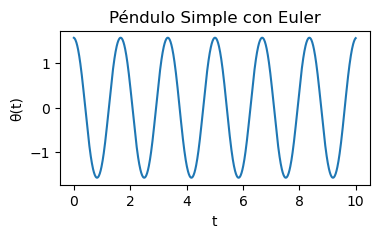

In [2]:
# CONDICIONES INICIALES
t0 = 0.0
x = pi/2 # Aquí \theta se va a llamar x
w = 0.0

Tiempo = []
Angulo = [] # Aquí albergaremos la solución

inicio = time.time()
for n in range(N+1):
    t = t0 + n * h  # Actualizar el tiempo en cada iteración
    w = w + h*S(x)
    x = x + h*w
    Tiempo.append(t)
    Angulo.append(x)
    
tiempo_transcurrido = time.time() - inicio
print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    
plt.figure(figsize=(4, 2))
plt.plot(Tiempo, Angulo)

# Agregar etiquetas a los ejes
plt.xlabel('t')
plt.ylabel("\u03b8(t)")

# Agregar un título a la gráfica
plt.title('Péndulo Simple con Euler')
plt.show()

### 3) Algoritmo de Verlet

El método de Euler realiza $2N$ operación para resolver la ecuación. El algoritmo de Verlet realiza la mitad y se desarrolla de la siguiente manera. Comenzamos con la serie de Taylor para $f$ en dos puntos:

$$f(t+h) = f(t) +h\frac{df(t)}{dt} + \dfrac{h^2}{2}\frac{d^2f(t)}{dt^2}+\ldots$$

$$f(t-h) = f(t) -h\frac{df(t)}{dt} + \dfrac{h^2}{2}\frac{d^2f(t)}{dt^2}+\ldots$$

Sumando ambas ecuaciones:

$$ f(t+h) \approx 2f(t) - f(t-h) + h^2 S(f(t),\frac{df(t)}{dt},t) $$

Dados $t_0$, $f(t_0)$ y $\frac{df(t_0)}{dt}$ calculamos el parámetro de arranque como:

$$f(t_0-h) = f(t_0) -h\frac{df(t_0)}{dt} + \dfrac{h^2}{2}S(f(t_0),\frac{df(t_0)}{dt},t_0)$$

y la aplicación del algoritmo queda como:

$$ f(t_{n+1}) = 2f(t_n) - f(t_{n-1}) + h^2 S(f(t_n),\frac{df(t_n)}{dt},t_n) $$
y sólo requiere de de la mitad de operaciones que el de Euler.

### 4) Péndulo simple con Verlet

Tiempo transcurrido: 0.0005671977996826172 segundos


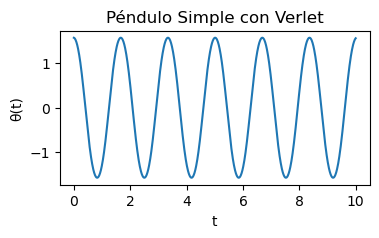

In [3]:
# CONDICIONES INICIALES
t0 = 0.0
x1 = pi/2 # Aquí \theta se va a llamar x
w = 0.0

Tiempo = []
Angulo = [] # Aquí albergaremos la solución

inicio = time.time() # Guárdamos el tiempo de inicio

x0 = x1 - h*w +0.5*h**2*S(x1)

for n in range(N+1):
    t = t0 + n * h
    x2 = 2*x1-x0+h**2*S(x1)
    Tiempo.append(t)
    Angulo.append(x2)
    x0 = x1
    x1 = x2
    
tiempo_transcurrido = time.time() - inicio # Actualizar el tiempo
print("Tiempo transcurrido:", tiempo_transcurrido, "segundos")
    
plt.figure(figsize=(4, 2))
plt.plot(Tiempo, Angulo)

# Agregar etiquetas a los ejes
plt.xlabel('t')
plt.ylabel("\u03b8(t)")

# Agregar un título a la gráfica
plt.title('Péndulo Simple con Verlet')
plt.show()